## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## Import data and Data Exploration

In [5]:
taxi_january_df = pd.read_parquet("data/yellow_tripdata_2019-01.parquet");
taxi_df = pd.concat([taxi_january_df])

In [6]:
taxi_df.head()
# taxi_df.info()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


In [7]:
taxi_df.shape

(7696617, 19)

In [8]:
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [9]:
useful_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID', 'DOLocationID', 'payment_type', 'total_amount']
taxi_df = taxi_df[useful_columns]

In [10]:
taxi_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


In [11]:
taxi_df['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

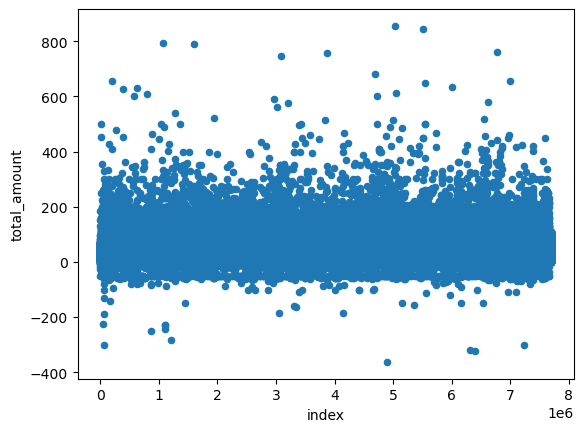

In [12]:
taxi_df[taxi_df['total_amount'] < 1000].reset_index().plot(kind = "scatter", y = 'total_amount', x = 'index')

## Data Cleaning

In [14]:
taxi_df_cleaned = taxi_df[(taxi_df['total_amount']>= 0) & (taxi_df['total_amount'] < 200)]
taxi_df_cleaned.head()


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


In [15]:
 taxi_df_cleaned.shape

(7688319, 9)

In [16]:
taxi_df_cleaned.dropna(axis = 0, inplace = True)

C:\Users\ayowo\AppData\Local\Temp\ipykernel_23108\151018370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df_cleaned.dropna(axis = 0, inplace = True)


In [17]:
taxi_df_cleaned.shape

(7659647, 9)

In [18]:
taxi_df_cleaned.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

## Data Preparation

In [20]:
taxi_df_prepared = taxi_df_cleaned.copy() 

In [21]:
taxi_df_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [22]:
taxi_df_prepared['RatecodeID'] = taxi_df_prepared['RatecodeID'].astype(str)
taxi_df_prepared['PULocationID'] = taxi_df_prepared['PULocationID'].astype(str)
taxi_df_prepared['DOLocationID'] = taxi_df_prepared['DOLocationID'].astype(str)
taxi_df_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
total_amount                    float64
dtype: object

In [23]:
taxi_df_prepared['transaction_date'] = pd.to_datetime(taxi_df_prepared['tpep_pickup_datetime'].dt.date)
taxi_df_prepared['transaction_year'] = taxi_df_prepared['tpep_pickup_datetime'].dt.year
taxi_df_prepared['transaction_month'] = taxi_df_prepared['tpep_pickup_datetime'].dt.month
taxi_df_prepared['transaction_day'] = taxi_df_prepared['tpep_pickup_datetime'].dt.day
taxi_df_prepared['transaction_hour'] = taxi_df_prepared['tpep_pickup_datetime'].dt.hour


In [24]:
taxi_df_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
total_amount                    float64
transaction_date         datetime64[ns]
transaction_year                  int32
transaction_month                 int32
transaction_day                   int32
transaction_hour                  int32
dtype: object

In [25]:
taxi_df_prepared = taxi_df_prepared[(taxi_df_prepared['transaction_year']== 2019) & (taxi_df_prepared['transaction_month'] == 1)]

Noting down the categorical and numeric columns

In [27]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour']
numeric_columns = ['trip_distance', 'total_amount']
all_needed_columns = numeric_columns + categorical_columns

In [28]:
taxi_df_main = taxi_df_prepared[all_needed_columns]
taxi_df_agg = taxi_df_main.groupby(categorical_columns).mean().reset_index()
taxi_df_agg.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,1,2019-01-01,1,1,2,0.0,21.800
1,1,2019-01-01,1,1,5,0.0,87.300
2,1,2019-01-01,1,1,6,0.0,80.300
3,1,2019-01-01,1,1,8,0.0,128.580
4,1,2019-01-01,1,1,10,16.9,43.245


In [29]:

taxi_df_agg['count_transactions'] = taxi_df_main.groupby(categorical_columns).count().reset_index()['total_amount']
taxi_df_agg.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [30]:
taxi_df_agg['count_transactions'].shape

(102496,)

## Bench Mark Model

In [32]:
taxi_df_bench = taxi_df_agg.copy()

In [33]:
from sklearn.model_selection import train_test_split

input_features = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour', 'trip_distance']
target_feature = 'total_amount'

X_bench = taxi_df_bench[input_features]
Y_bench = taxi_df_bench[target_feature]

#one hot encode
X_bench = pd.get_dummies(X_bench)

x_train, x_test, y_train, y_test = train_test_split(X_bench, Y_bench, test_size = 0.33, random_state = 42)


#### Fit model to tree

In [35]:
from sklearn.tree import DecisionTreeRegressor

base_model = DecisionTreeRegressor(max_depth = 10)
base_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [37]:
y_pred = base_model.predict(x_test)

print(f"mean absolute error = {mean_absolute_error(y_pred, y_test)}")
print(f"mean squared error = {mean_squared_error(y_pred, y_test)}")
print(f"r2 score = {r2_score(y_pred, y_test)}")

mean absolute error = 3.3882450418154493
mean squared error = 65.81955062878683
r2 score = 0.7162514687856036


<Axes: xlabel='pred', ylabel='test'>

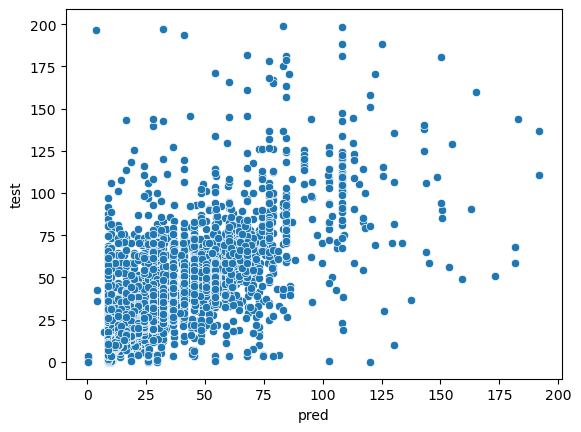

In [38]:
data = {'pred':y_pred, 'test':y_test}
df = pd.DataFrame(data = data)
sns.scatterplot(data = df, x = 'pred', y = 'test')

In [39]:

input_features = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
target_feature = 'total_amount'

X_bench = taxi_df_bench[input_features]
Y_bench = taxi_df_bench[target_feature]

#one hot encoding
X_bench = pd.get_dummies(X_bench)

x_train, x_test, y_train, y_test = train_test_split(X_bench, Y_bench, test_size = 0.33)

base_model = DecisionTreeRegressor(max_depth = 10)
base_model.fit(x_train, y_train)
y_pred = base_model.predict(x_test)

print(f"mean absolute error = {mean_absolute_error(y_pred, y_test)}")
print(f"mean squared error = {mean_squared_error(y_pred, y_test)}")
print(f"r2 score = {r2_score(y_pred, y_test)}")

mean absolute error = 9.863182263538873
mean squared error = 217.14515659480998
r2 score = -1.7781137081380116


## Feature Engineering

In [41]:
taxi_df_eng = taxi_df_bench.copy()

taxi_df_eng.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [42]:
taxi_df_eng.dtypes

PULocationID                  object
transaction_date      datetime64[ns]
transaction_month              int32
transaction_day                int32
transaction_hour               int32
trip_distance                float64
total_amount                 float64
count_transactions             int64
dtype: object

In [43]:
taxi_df_eng['transaction_weekday'] = taxi_df_eng['transaction_date'].dt.weekday
taxi_df_eng['is_weekend'] = taxi_df_eng['transaction_weekday'].apply(lambda x : True if x > 5 else False)

In [44]:
taxi_df_eng.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_transactions,transaction_weekday,is_weekend
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False


In [45]:
from pandas.tseries.holiday import USFederalHolidayCalendar

calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start = "2018", end = "2020").date

taxi_df_eng['is_holiday'] = taxi_df_eng['transaction_date'].isin(holidays)

C:\Users\ayowo\AppData\Local\Temp\ipykernel_23108\2961379168.py:6: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  taxi_df_eng['is_holiday'] = taxi_df_eng['transaction_date'].isin(holidays)


In [46]:
taxi_df_eng.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_transactions,transaction_weekday,is_weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


##### Adding Borough Information

In [49]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID', 'Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [50]:
taxi_df_eng = pd.merge(left = taxi_df_eng, right = zone_lookup, left_on = 'PULocationID', right_on = 'LocationID', how = 'left')

In [51]:
taxi_df_eng.tail()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_transactions,transaction_weekday,is_weekend,is_holiday,LocationID,Borough
102491,98,2019-01-31,1,31,18,16.66,58.06,1,3,False,False,98,Queens
102492,99,2019-01-18,1,18,18,1.66,9.80,1,4,False,False,99,Staten Island
102493,99,2019-01-26,1,26,8,0.42,6.00,1,5,False,False,99,Staten Island
102494,99,2019-01-30,1,30,7,2.87,18.05,1,2,False,False,99,Staten Island
102495,99,2019-01-30,1,30,11,31.60,99.32,1,2,False,False,99,Staten Island


## New Models with Engineered Features

In [53]:
taxi_df_eng['transaction_month'] = taxi_df_eng['transaction_month'].astype(str)
taxi_df_eng['transaction_day'] = taxi_df_eng['transaction_day'].astype(str)
taxi_df_eng['transaction_hour'] = taxi_df_eng['transaction_hour'].astype(str)


In [54]:
taxi_df_eng.dtypes

PULocationID                   object
transaction_date       datetime64[ns]
transaction_month              object
transaction_day                object
transaction_hour               object
trip_distance                 float64
total_amount                  float64
count_transactions              int64
transaction_weekday             int32
is_weekend                       bool
is_holiday                       bool
LocationID                     object
Borough                        object
dtype: object

In [55]:
taxi_df_eng.isna().sum()

PULocationID             0
transaction_date         0
transaction_month        0
transaction_day          0
transaction_hour         0
trip_distance            0
total_amount             0
count_transactions       0
transaction_weekday      0
is_weekend               0
is_holiday               0
LocationID               0
Borough                709
dtype: int64

In [56]:
taxi_df_eng.dropna(axis = 0, inplace = True)
taxi_df_eng.isna().sum()

PULocationID           0
transaction_date       0
transaction_month      0
transaction_day        0
transaction_hour       0
trip_distance          0
total_amount           0
count_transactions     0
transaction_weekday    0
is_weekend             0
is_holiday             0
LocationID             0
Borough                0
dtype: int64

In [57]:
taxi_df_eng['transaction_month'].value_counts()

transaction_month
1    101787
Name: count, dtype: int64

In [58]:
relevant_cols = ['PULocationID', 'transaction_day', 'transaction_hour', 'transaction_weekday', 'is_weekend', 'is_holiday', 'Borough']
target_feature = 'total_amount'

X_eng = taxi_df_eng[relevant_cols]
Y_eng = taxi_df_eng[target_feature]


In [59]:
X_eng.head()

,PULocationID,transaction_day,transaction_hour,transaction_weekday,is_weekend,is_holiday,Borough
0,1,1,2,1,False,True,EWR
1,1,1,5,1,False,True,EWR
2,1,1,6,1,False,True,EWR
3,1,1,8,1,False,True,EWR
4,1,1,10,1,False,True,EWR


Encoding, Split data into train and test

In [61]:
X_eng = pd.get_dummies(X_eng)

x_train, x_test, y_train, y_test = train_test_split(X_eng, Y_eng, test_size = 0.30, random_state = 42)

### Decision Tree Regressor 2

In [63]:
model_eng = DecisionTreeRegressor(max_depth = 10)

model_eng.fit(x_train, y_train)

y_pred = model_eng.predict(x_test)

print(f"Mean absolute error = {mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error = {mean_squared_error(y_test, y_pred)}")
print(f"r2 score = {r2_score(y_test, y_pred)}")

Mean absolute error = 8.379775848116484
Mean squared error = 186.23826623194876
r2 score = 0.29851273480731844


### Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

random_model = RandomForestRegressor()
random_model.fit(x_train, y_train)

y_pred = random_model.predict(x_test)


print(f"Mean absolute error = {mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error = {mean_squared_error(y_test, y_pred)}")
print(f"r2 score = {r2_score(y_test, y_pred)}")

Mean absolute error = 7.028985530095265
Mean squared error = 161.37406852775098
r2 score = 0.3921665171455032


<Axes: xlabel='actual', ylabel='predicted'>

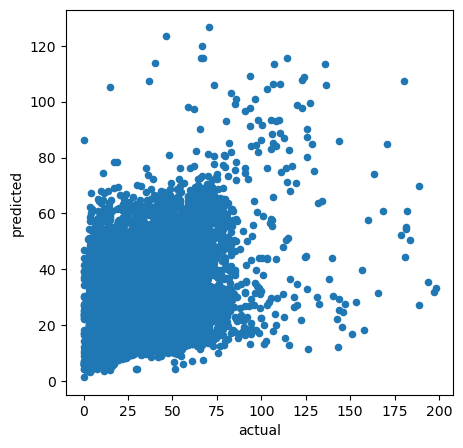

In [66]:
data = {'actual': y_test, 'predicted': y_pred}
results = pd.DataFrame(data)

results.plot(kind = 'scatter', x = 'actual', y = 'predicted', figsize = (5, 5))

### Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print(f"Mean absolute error = {mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error = {mean_squared_error(y_test, y_pred)}")
print(f"r2 score = {r2_score(y_test, y_pred)}")

Mean absolute error = 8.217547436312307
Mean squared error = 171.400384674272
r2 score = 0.3544012756842203


## Tuning

### Tuning parameters

In [71]:
n_estimators = [x for x in range(200, 2000, 180)]
max_features = ['auto', 'sqrt']
max_depth = [10, 20, 50, 100, 200, 300, 500]
min_samples_split = [2, 5, 10, 20, 40]
min_samples_leaf = [1, 2, 4, 10, 20]
bootstrap = [True, False]
# print(n_estimators)

In [72]:
import pprint as pp

In [73]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 200, 300, 500],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 380, 560, 740, 920, 1100, 1280, 1460, 1640, 1820]}


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose = 2, random_state = 42)

In [134]:
rf_random.fit(x_train, y_train)

performace = pd.DataFrame(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.7s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=40, n_estimators=200; total time=  23.9s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=40, n_estimators=200; total time=  24.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=40, n_estimators=200; total time=  24.7s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimator

C:\Users\ayowo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ayowo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ayowo\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ayowo\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ayowo\anaconda3\Lib\site-packages\

#### Best Model

In [ ]:
from sklearn.esnemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators = 200,
    min_samples_split = 10,
    min_samples_leaf = 2,
    max_features = 'sqrt',
    max_depth = 150,
    bootstrap = True
)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print(f"Mean absolute error = {mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error = {mean_squared_error(y_test, y_pred)}")
print(f"r2 score = {r2_score(y_test, y_pred)}")